In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, auc, roc_curve, classification_report

## Application to Gene Expression Data

In [2]:
data_x_train = pd.read_csv('data/Khanxtrain.csv')
data_x_test = pd.read_csv('data/Khanxtest.csv')
data_y_train = pd.read_csv('data/Khanytrain.csv')
data_y_test = pd.read_csv('data/Khanytest.csv')
X_train, X_test = data_x_train.iloc[:,1:], data_x_test.iloc[:,1:]
y_train, y_test = data_y_train.iloc[:,1:], data_y_test.iloc[:,1:]

In [3]:
svc = SVC(C=10, kernel='linear')
svc.fit(X_train, y_train)
svc.score(X_train, y_train)

1.0

In [4]:
# Calculate test error on test set
y_pred = svc.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
clf_pred_result = pd.DataFrame(matrix, index=svc.classes_, columns=['Pred 1', 2, 3, 4])

# Print result
print('Accuracy: {:.4f}'.format(np.diagonal(matrix).sum()/(matrix.sum())))
print('')
print(clf_pred_result)
print('')
print(classification_report(y_test, y_pred))

Accuracy: 0.9000

   Pred 1  2  3  4
1       3  0  0  0
2       0  6  0  0
3       0  2  4  0
4       0  0  0  5

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         6
           3       1.00      0.67      0.80         6
           4       1.00      1.00      1.00         5

    accuracy                           0.90        20
   macro avg       0.94      0.92      0.91        20
weighted avg       0.93      0.90      0.90        20



## Application to Handwritten Letter Data

In [5]:
X_train = pd.read_csv('data/optdigits.tra', header=None)
y_train = X_train[64]
X_train.drop(columns=64, inplace=True)

X_test = pd.read_csv('data/optdigits.tes', header=None)
y_test = X_test[64]
X_test.drop(columns=64, inplace=True)

In [6]:
print(X_train.shape)
print(X_test.shape)

(3823, 64)
(1797, 64)


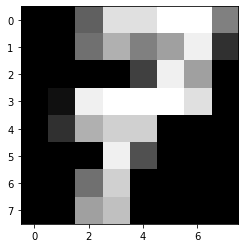

7


In [7]:
plt.imshow(X_train.values[10].reshape(8,8), cmap='gray')
plt.show()
print(y_train[10])

In [8]:
# Use linear kernel
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
print('Training Accuracy: {:.4f}.\n'.format(svc.score(X_train, y_train)))

# Calculate test error on test set
y_pred = svc.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
clf_pred_result = pd.DataFrame(matrix, index=svc.classes_, columns=svc.classes_)

# Print result
print('Test Accuracy: {:.4f}'.format(np.diagonal(matrix).sum()/(matrix.sum())))
print('')
print(clf_pred_result)
print('')
print(classification_report(y_test, y_pred))

Training Accuracy: 1.0000.

Test Accuracy: 0.9610

     0    1    2    3    4    5    6    7    8    9
0  177    0    0    0    0    1    0    0    0    0
1    0  178    0    0    0    0    3    0    1    0
2    0    7  170    0    0    0    0    0    0    0
3    1    0    5  171    0    2    0    2    1    1
4    0    0    0    0  180    0    0    0    1    0
5    0    0    1    0    0  180    0    0    0    1
6    0    0    0    0    1    0  179    0    1    0
7    0    0    0    0    1    7    0  165    0    6
8    0    9    1    5    0    2    0    0  157    0
9    1    0    0    4    1    3    0    0    1  170

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.92      0.98      0.95       182
           2       0.96      0.96      0.96       177
           3       0.95      0.93      0.94       183
           4       0.98      0.99      0.99       181
           5       0.92      0.99      0.95       1

In [9]:
# Use poly d=2 kernel
svc = SVC(kernel='poly', degree=2)
svc.fit(X_train, y_train)
print('Training Accuracy: {:.4f}.\n'.format(svc.score(X_train, y_train)))

# Calculate test error on test set
y_pred = svc.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
clf_pred_result = pd.DataFrame(matrix, index=svc.classes_, columns=svc.classes_)

# Print result
print('Test Accuracy: {:.4f}'.format(np.diagonal(matrix).sum()/(matrix.sum())))
print('')
print(clf_pred_result)
print('')
print(classification_report(y_test, y_pred))

Training Accuracy: 0.9945.

Test Accuracy: 0.9727

     0    1    2    3    4    5    6    7    8    9
0  177    0    0    0    1    0    0    0    0    0
1    0  180    0    0    0    0    0    0    1    1
2    0    3  173    0    0    0    0    0    1    0
3    0    0    2  173    0    3    0    3    1    1
4    0    0    0    0  180    0    0    0    1    0
5    0    0    0    0    0  180    0    0    0    2
6    0    0    0    0    1    0  180    0    0    0
7    0    0    0    0    0    5    0  168    0    6
8    0    6    0    0    0    0    0    0  164    4
9    0    1    0    2    1    2    0    0    1  173

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       178
           1       0.95      0.99      0.97       182
           2       0.99      0.98      0.98       177
           3       0.99      0.95      0.97       183
           4       0.98      0.99      0.99       181
           5       0.95      0.99      0.97       1

In [18]:
# Use poly d=2 kernel
svc = SVC(kernel='rbf', gamma=0.001, C=10)
svc.fit(X_train, y_train)
print('Training Accuracy: {:.4f}.\n'.format(svc.score(X_train, y_train)))

# Calculate test error on test set
y_pred = svc.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
clf_pred_result = pd.DataFrame(matrix, index=svc.classes_, columns=svc.classes_)

# Print result
print('Test Accuracy: {:.4f}'.format(np.diagonal(matrix).sum()/(matrix.sum())))
print('')
print(clf_pred_result)
print('')
print(classification_report(y_test, y_pred))

Training Accuracy: 1.0000.

Test Accuracy: 0.9827

     0    1    2    3    4    5    6    7    8    9
0  178    0    0    0    0    0    0    0    0    0
1    0  181    0    0    0    0    0    0    1    0
2    0    3  174    0    0    0    0    0    0    0
3    0    0    0  179    0    1    0    1    1    1
4    0    0    0    0  181    0    0    0    0    0
5    0    0    0    0    0  180    0    0    0    2
6    1    0    0    0    0    0  180    0    0    0
7    0    0    0    0    0    1    0  171    0    7
8    0    5    0    1    0    1    0    0  166    1
9    0    0    0    2    0    1    0    0    1  176

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       178
           1       0.96      0.99      0.98       182
           2       1.00      0.98      0.99       177
           3       0.98      0.98      0.98       183
           4       1.00      1.00      1.00       181
           5       0.98      0.99      0.98       1

In [13]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10],
                     'gamma': [0.001, 0.01, 0.1, 1, 10]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)
clf.best_params_

{'C': 10, 'gamma': 0.001}

In [17]:
clf.cv_results_

{'mean_fit_time': array([1.29227486, 1.28358636, 1.28863206, 1.10576601, 0.95680418,
        0.43489957, 1.28284302, 1.33578677, 1.33749714, 1.11758928,
        0.22570844, 1.39480262, 1.53570123, 1.19697928, 1.03346982,
        0.22036438, 1.39237347, 1.41719646, 1.23103533, 1.08217521]),
 'std_fit_time': array([0.02438644, 0.00875355, 0.00416763, 0.00554128, 0.00402786,
        0.00420636, 0.00417343, 0.0038252 , 0.09763812, 0.07385081,
        0.00273679, 0.00448533, 0.07462062, 0.03628415, 0.0079732 ,
        0.00238389, 0.00514638, 0.00613886, 0.00880637, 0.01147065]),
 'mean_score_time': array([0.18305936, 0.16443248, 0.16311531, 0.14417114, 0.13569508,
        0.09436464, 0.16217561, 0.16192036, 0.16161065, 0.15447607,
        0.05856338, 0.15782852, 0.17661157, 0.14597397, 0.13917894,
        0.05667138, 0.15923562, 0.16450739, 0.14224992, 0.13842697]),
 'std_score_time': array([0.02084558, 0.00452912, 0.00232045, 0.00349127, 0.00088172,
        0.00046995, 0.00040597, 0.000379